**Mounting from google drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Or Uploading dataset from local


In [1]:
from google.colab import files
uploaded = files.upload()

Saving dataset.csv to dataset.csv


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [130]:
df = pd.read_csv('/content/dataset.csv')

In [131]:
df = df.drop(['file_name'], axis=1)

In [132]:
df.shape

(1742, 30)

# **randomize dataframe rows**

In [133]:
df = df.sample(frac=1).reset_index(drop=True)

In [134]:
df.head()

,zero_crossing,spectral_centroid,spectral_rolloff,spectral_bandwidth,chroma_frequency,rmse,delta,melspectogram,tempo,mfcc0,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,label
0,307675,2583.186287,5281.581769,2405.790450,0.291621,0.110442,-3.499151e-08,2.809176,123.046875,-129.086650,...,-2.174977,-10.430623,-3.001996,-8.632151,-0.285520,-2.632858,1.175140,-6.034320,-1.338517,palligeeti
1,150977,2134.004094,4905.705635,2492.027414,0.390701,0.272875,7.662492e-08,18.874161,89.102909,-81.207045,...,4.458010,2.557230,5.589688,4.155814,9.300203,-3.120857,6.756443,-0.397378,5.054115,hiphop
2,279124,2287.323681,4467.909668,2035.525739,0.293873,0.145754,8.701130e-08,4.667023,161.499023,-106.093536,...,2.295453,-6.612689,0.006645,-7.153671,-4.005429,-3.345657,-0.824423,-4.970870,-1.820649,band
3,238859,1881.390457,3271.609495,1718.568212,0.252733,0.267582,-1.530298e-07,16.456683,95.703125,-92.575544,...,-4.319799,-15.138402,0.250207,1.517032,7.284802,-7.287222,13.692838,6.536130,12.669878,palligeeti
4,168546,1621.333961,3192.973557,1892.296793,0.282386,0.111894,-3.987158e-08,3.068798,135.999178,-159.761630,...,-4.968462,-3.625933,-4.558918,-5.896704,4.462878,-6.339946,-3.322477,1.900579,-4.437796,palligeeti


# **Dataset Visualization**

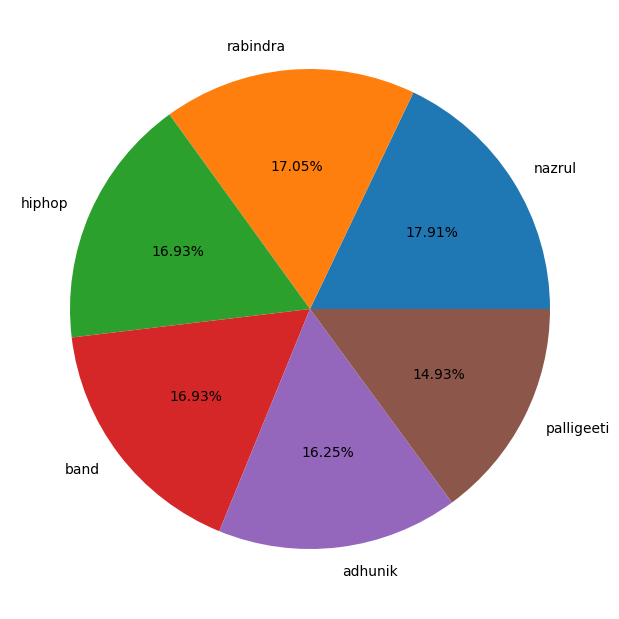

In [135]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie(df['label'].value_counts().values,
       labels = df['label'].value_counts().index,autopct='%1.2f%%')
plt.show()

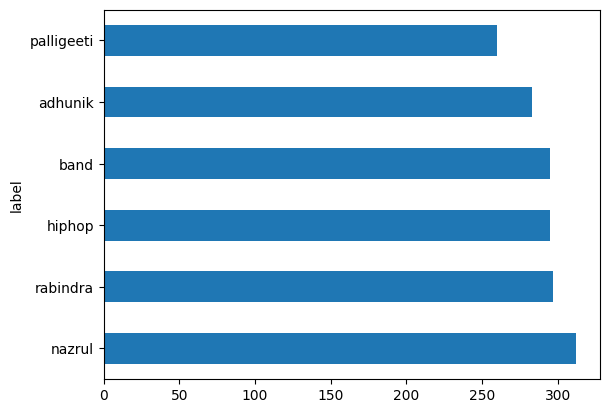

In [136]:
df['label'].value_counts().plot(kind='barh');

In [137]:
import seaborn as sns

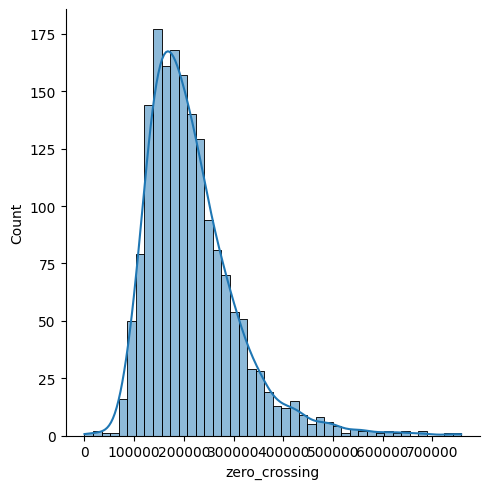

In [138]:
sns.displot(df['zero_crossing'],kde =True)

# **Converting textual labeling values to integer number bold text**

In [61]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df

In [20]:
le = LabelEncoder()
y = le.fit_transform(df['label'].values)
X=df.drop(['label'], axis=1)

In [21]:
dic={'Label before encoding':le.inverse_transform(np.unique(y)),'Label after encoding':np.unique(y)}
pd.DataFrame(dic)

,Label before encoding,Label after encoding
0,adhunik,0
1,band,1
2,hiphop,2
3,nazrul,3
4,palligeeti,4
5,rabindra,5


In [62]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

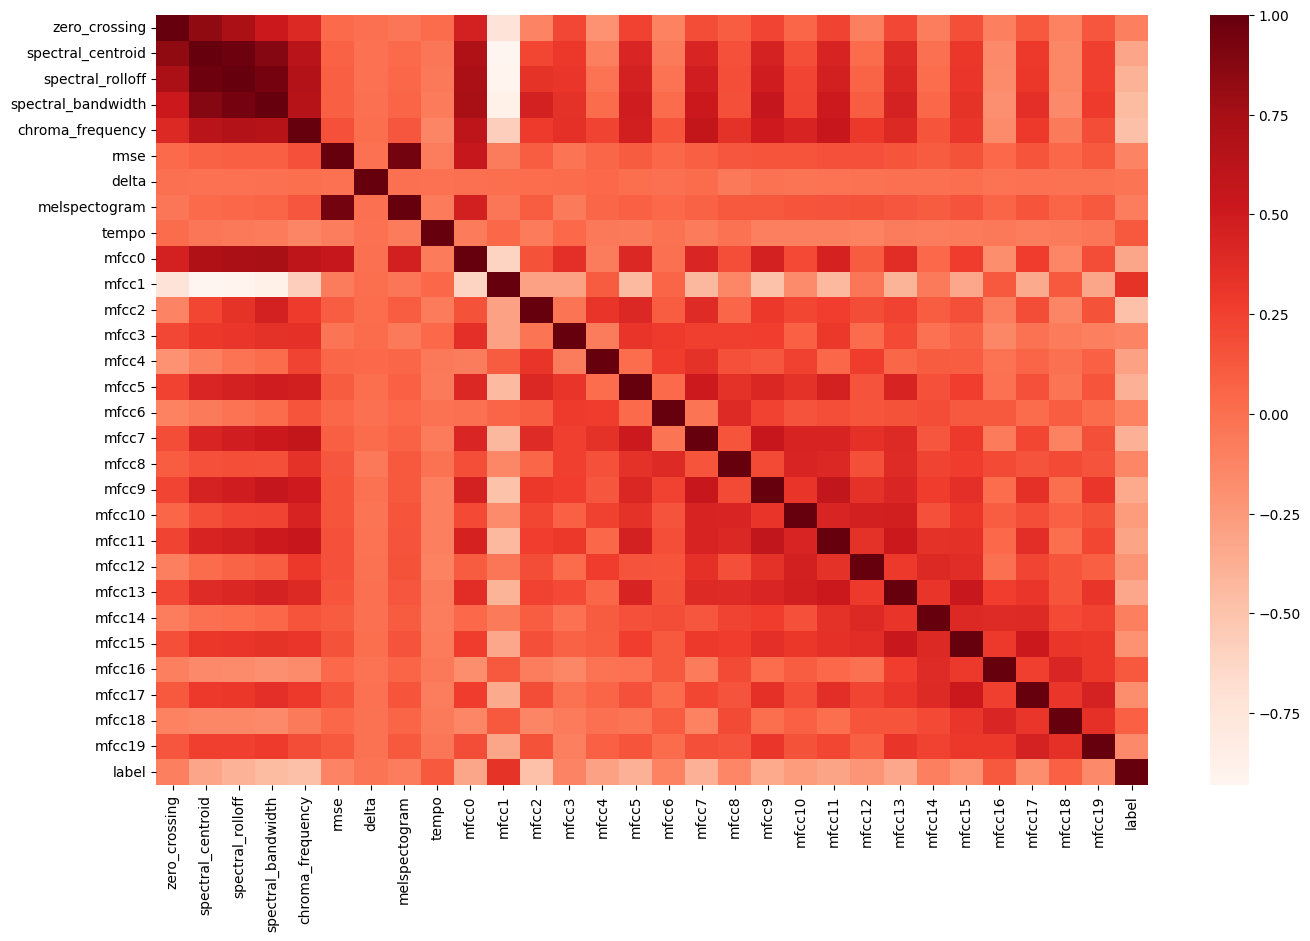

In [63]:
import seaborn as sns
plt.figure(figsize=(16,10))
cor = df.corr()
sns.heatmap(cor, annot=False, cmap=plt.cm.Reds)
plt.show()

In [64]:
cor["mfcc2"]

zero_crossing        -0.116080
spectral_centroid     0.222895
spectral_rolloff      0.333943
spectral_bandwidth    0.461123
chroma_frequency      0.278345
rmse                  0.100601
delta                 0.018871
melspectogram         0.095789
tempo                -0.069851
mfcc0                 0.161292
mfcc1                -0.290738
mfcc2                 1.000000
mfcc3                -0.032688
mfcc4                 0.318207
mfcc5                 0.405035
mfcc6                 0.101958
mfcc7                 0.383188
mfcc8                 0.057400
mfcc9                 0.291595
mfcc10                0.217109
mfcc11                0.262176
mfcc12                0.190373
mfcc13                0.244226
mfcc14                0.100696
mfcc15                0.173862
mfcc16               -0.080646
mfcc17                0.191893
mfcc18               -0.128495
mfcc19                0.157197
label                -0.484444
Name: mfcc2, dtype: float64

In [66]:
#Correlation with output variable
cor_target = abs(cor["label"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1]
relevant_features

spectral_centroid     0.318044
spectral_rolloff      0.391556
spectral_bandwidth    0.448250
chroma_frequency      0.472596
rmse                  0.117765
tempo                 0.121005
mfcc0                 0.320392
mfcc1                 0.334814
mfcc2                 0.484444
mfcc3                 0.118058
mfcc4                 0.293160
mfcc5                 0.380294
mfcc6                 0.109333
mfcc7                 0.385781
mfcc8                 0.135965
mfcc9                 0.337090
mfcc10                0.264609
mfcc11                0.304538
mfcc12                0.221842
mfcc13                0.330245
mfcc15                0.204592
mfcc16                0.123965
mfcc17                0.180420
mfcc19                0.147455
label                 1.000000
Name: label, dtype: float64

In [68]:
# Select the highly correlated features
relevant_features = cor_target[cor_target > 0.1].index.tolist()

# Keep only the relevant features in df
df = df[relevant_features]

In [69]:
df.head()

,spectral_centroid,spectral_rolloff,spectral_bandwidth,chroma_frequency,rmse,tempo,mfcc0,mfcc1,mfcc2,mfcc3,...,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc15,mfcc16,mfcc17,mfcc19,label
0,2363.617418,5285.858912,2688.119882,0.327095,0.128412,89.102909,-124.110760,87.038834,14.925251,19.306841,...,-0.428149,-7.405119,1.259883,-5.821235,-1.422577,-0.079113,-3.530509,-0.868522,1.035557,1
1,1302.602728,2403.019476,1649.509685,0.222747,0.083918,129.199219,-227.481823,146.723092,-2.651290,28.481993,...,1.088622,-8.646023,3.359188,-7.452506,2.227502,-1.502265,1.241323,3.157029,6.265726,5
2,3078.933122,6115.342195,2649.721781,0.278849,0.139006,117.453835,-78.931251,59.634409,-11.894006,15.090827,...,8.970158,-0.412114,2.120438,-2.382302,-1.061007,0.212325,-7.000400,0.214570,-1.503583,4
3,2270.354543,4663.283364,2375.861634,0.275468,0.065547,135.999178,-187.345727,89.833990,-3.296444,31.757208,...,0.139750,-14.976885,3.624984,-13.499995,0.889612,-6.784742,-3.024461,-6.107403,-0.918341,5
4,1665.942770,3457.718965,2132.642765,0.319858,0.317405,112.347147,-61.562434,121.613359,-0.567074,21.492555,...,10.092546,-0.765081,3.281376,-4.923759,3.608351,3.448412,-0.904884,6.155476,4.019775,0


In [70]:
le = LabelEncoder()
y = le.fit_transform(df['label'].values)
X=df.drop(['label'], axis=1)

In [71]:
relevant_features

['spectral_centroid',
 'spectral_rolloff',
 'spectral_bandwidth',
 'chroma_frequency',
 'rmse',
 'tempo',
 'mfcc0',
 'mfcc1',
 'mfcc2',
 'mfcc3',
 'mfcc4',
 'mfcc5',
 'mfcc6',
 'mfcc7',
 'mfcc8',
 'mfcc9',
 'mfcc10',
 'mfcc11',
 'mfcc12',
 'mfcc13',
 'mfcc15',
 'mfcc16',
 'mfcc17',
 'mfcc19',
 'label']

In [72]:
df.shape

(1742, 25)

# **Feature Scaling**

In [73]:
from sklearn.preprocessing import StandardScaler

In [74]:
def standard_scaler(x_train,x_test):
  sc = StandardScaler()
  x_train = sc.fit_transform(x_train)
  x_test = sc.transform(x_test)
  return x_train,x_test

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) ###train test split

In [77]:
X_train_sc,X_test_sc=standard_scaler(X_train,X_test)

In [78]:
X_test

,spectral_centroid,spectral_rolloff,spectral_bandwidth,chroma_frequency,rmse,tempo,mfcc0,mfcc1,mfcc2,mfcc3,...,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc15,mfcc16,mfcc17,mfcc19
482,2523.693576,5584.081527,2564.912145,0.306312,0.373365,129.199219,-0.599386,85.655915,-3.053888,12.189332,...,-8.005530,8.334696,-4.216283,4.324967,-6.697124,2.718028,2.931543,-3.650043,5.672053,8.815422
1507,1726.769281,3435.298336,2066.970177,0.262692,0.146810,161.499023,-134.800654,122.020574,-5.342413,24.402723,...,-6.506457,6.990584,-9.646790,2.890625,-8.760655,-2.775178,-0.972918,-1.695634,2.458001,-1.007550
950,0.000000,0.000000,0.000000,0.000000,0.000000,120.000000,-1131.370850,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1005,1719.596571,3405.193348,1894.892242,0.236665,0.140892,143.554688,-150.029393,115.362281,-25.984862,20.920254,...,-12.244179,-1.928263,-7.229565,-6.603114,-4.908384,-3.416728,-2.678682,-9.103043,-6.442342,0.045121
705,2355.038045,4413.631697,2109.383458,0.307220,0.141666,135.999178,-95.857276,90.568976,-30.817965,23.517574,...,-19.949540,4.823386,-3.312315,-7.702764,-8.935123,-2.817139,1.862508,-4.091943,-1.132882,-6.401676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,870.142836,1513.118735,767.380005,0.216244,0.111239,112.347147,-260.112813,182.195933,-26.744884,-0.581784,...,-8.754497,-6.217090,-0.896381,-2.112596,-9.920334,-1.439025,-12.920808,0.298602,-2.503026,0.697765
56,3235.326609,7060.300841,3027.322214,0.436408,0.032305,135.999178,-244.258049,58.012897,22.133488,24.995950,...,-6.291668,7.736476,7.178962,8.764833,0.783793,-0.707104,4.778232,-7.777392,-0.787657,-0.742045
513,2069.971583,4428.742936,2336.137294,0.333792,0.146904,99.384014,-130.815816,110.433775,4.875857,14.246863,...,-11.646989,2.910269,-8.740018,-2.702689,-8.957924,-0.931462,-3.389684,-4.924788,2.895877,0.051142
366,1892.771158,3814.531690,2115.957132,0.280802,0.174322,135.999178,-108.830009,111.708576,-17.430883,38.421054,...,-11.697587,0.394544,-3.017751,-5.220965,-6.452210,-9.487865,-1.600874,-8.984543,0.788608,-8.039513


In [91]:
!pip install shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 2.7 MB/s eta 0:00:00


In [79]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [80]:
from sklearn.model_selection import cross_val_score

# **XGBoost**

In [81]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train_sc, y_train)
y_pred = classifier.predict(X_test_sc)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.74      0.67        53
           1       0.78      0.75      0.76        60
           2       0.84      0.81      0.83        64
           3       0.83      0.74      0.78        61
           4       0.70      0.67      0.69        55
           5       0.69      0.71      0.70        56

    accuracy                           0.74       349
   macro avg       0.74      0.74      0.74       349
weighted avg       0.75      0.74      0.74       349



In [90]:
scores1=cross_val_score(XGBClassifier(),X,y,cv=5)
np.average(scores1)

0.7382319173363948

In [89]:

y_pred_cv = cross_val_predict(XGBClassifier(), X, y, cv=5)
#increase the values of cv for better results
# Calculate precision, recall, and F1-score
report = classification_report(y, y_pred_cv)
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.70      0.69       283
           1       0.77      0.78      0.77       295
           2       0.80      0.85      0.82       295
           3       0.81      0.79      0.80       312
           4       0.67      0.62      0.64       260
           5       0.68      0.68      0.68       297

    accuracy                           0.74      1742
   macro avg       0.73      0.74      0.73      1742
weighted avg       0.74      0.74      0.74      1742



In [ ]:
import shap
import xgboost
import matplotlib.pyplot as plt

# Train your XGBoost classifier
classifier = xgboost.XGBClassifier()
classifier.fit(X_train, y_train)


explainer = shap.Explainer(classifier)


shap_values = explainer.shap_values(X_test)


shap.summary_plot(shap_values[0], X_test, plot_type="dot")

plt.savefig(f"XGboost_shap_summary_plot_output_{0}.png")
plt.clf()

# ***GBM***

In [116]:
from sklearn.ensemble import GradientBoostingClassifier
#from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Instantiate a GradientBoostingClassifier with default hyperparameters
gbm = GradientBoostingClassifier()

# Train the model on the training data
gbm.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gbm.predict(X_test)

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Accuracy: 0.7191977077363897
Precision: 0.7177637655915676
Recall: 0.7161166241867215
F1 score: 0.7165408915408915


In [119]:
scores3=cross_val_score(GradientBoostingClassifier(),X,y,cv=7)

In [120]:
np.average(scores3)

0.7060823940924992

# **CatBoost**

In [121]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 2.7 MB/s eta 0:00:00


In [122]:
from catboost import CatBoostClassifier

In [123]:
classifier = CatBoostClassifier()
classifier.fit(X_train, y_train)

Learning rate set to 0.080476
0:	learn: 1.7199796	total: 90.5ms	remaining: 1m 30s
1:	learn: 1.6452288	total: 118ms	remaining: 59s
2:	learn: 1.5797331	total: 146ms	remaining: 48.5s
3:	learn: 1.5350587	total: 173ms	remaining: 43s
4:	learn: 1.4895819	total: 202ms	remaining: 40.2s
5:	learn: 1.4445924	total: 229ms	remaining: 37.9s
6:	learn: 1.4125545	total: 255ms	remaining: 36.2s
7:	learn: 1.3778820	total: 282ms	remaining: 34.9s
8:	learn: 1.3426628	total: 310ms	remaining: 34.2s
9:	learn: 1.3100049	total: 338ms	remaining: 33.5s
10:	learn: 1.2814464	total: 365ms	remaining: 32.8s
11:	learn: 1.2528411	total: 392ms	remaining: 32.3s
12:	learn: 1.2214291	total: 422ms	remaining: 32.1s
13:	learn: 1.1970159	total: 449ms	remaining: 31.6s
14:	learn: 1.1719392	total: 476ms	remaining: 31.3s
15:	learn: 1.1473974	total: 506ms	remaining: 31.1s
16:	learn: 1.1299963	total: 534ms	remaining: 30.9s
17:	learn: 1.1120965	total: 562ms	remaining: 30.7s
18:	learn: 1.0941759	total: 590ms	remaining: 30.5s
19:	learn: 1.

In [127]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from catboost import CatBoostClassifier

# Assuming you have already defined X, y, and CatBoostClassifier()

# Perform cross-validation predictions
y_pred_cv = cross_val_predict(CatBoostClassifier(), X, y, cv=11)

# Calculate precision, recall, and F1-score
report = classification_report(y, y_pred_cv)
print("Classification Report:")
print(report)


Streaming output truncated to the last 5000 lines.
18:	learn: 1.0842272	total: 596ms	remaining: 30.8s
19:	learn: 1.0682358	total: 625ms	remaining: 30.6s
20:	learn: 1.0508796	total: 653ms	remaining: 30.4s
21:	learn: 1.0358605	total: 681ms	remaining: 30.3s
22:	learn: 1.0202247	total: 710ms	remaining: 30.1s
23:	learn: 1.0058478	total: 745ms	remaining: 30.3s
24:	learn: 0.9924382	total: 775ms	remaining: 30.2s
25:	learn: 0.9765933	total: 803ms	remaining: 30.1s
26:	learn: 0.9665296	total: 831ms	remaining: 29.9s
27:	learn: 0.9558968	total: 860ms	remaining: 29.8s
28:	learn: 0.9454273	total: 887ms	remaining: 29.7s
29:	learn: 0.9366757	total: 915ms	remaining: 29.6s
30:	learn: 0.9260952	total: 945ms	remaining: 29.5s
31:	learn: 0.9161547	total: 983ms	remaining: 29.7s
32:	learn: 0.9060629	total: 1.01s	remaining: 29.6s
33:	learn: 0.8960479	total: 1.04s	remaining: 29.6s
34:	learn: 0.8871431	total: 1.07s	remaining: 29.5s
35:	learn: 0.8798725	total: 1.1s	remaining: 29.4s
36:	learn: 0.8706320	total: 1.13

In [129]:
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.72      0.70       283
           1       0.76      0.77      0.76       295
           2       0.81      0.82      0.81       295
           3       0.80      0.80      0.80       312
           4       0.69      0.65      0.67       260
           5       0.70      0.67      0.69       297

    accuracy                           0.74      1742
   macro avg       0.74      0.74      0.74      1742
weighted avg       0.74      0.74      0.74      1742



In [ ]:

explainer = shap.Explainer(classifier)

shap_values = explainer.shap_values(X_test)


shap.summary_plot(shap_values[0], X_test, plot_type="dot")


plt.savefig(f"Catboost_shap_summary_plot_output_{0}.png")